In [1]:
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
import os
import xarray as xr
import numpy as np
import xesmf as xe
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from collections import OrderedDict
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
%matplotlib inline

In [ ]:
plt.figure(figsize=(20,10))
era_file = '/work/08589/hvtran/ls6/ERA5_PredRNN-main/validation/ERA5_TC_tracks.txt'
era_track_df = pd.read_csv(era_file)
era_track_df.columns = era_track_df.columns.str.strip()
era_groups = era_track_df.groupby('track_id')
for name, group in era_groups:
    plt.plot(group.lon, group.lat)

pred_file = '/work/08589/hvtran/ls6/ERA5_PredRNN-main/validation/prediction_2012102112_2_336.202209061323_t0_2012102112.txt'
pred_track_df = pd.read_csv(pred_file)
pred_track_df.columns = pred_track_df.columns.str.strip()
pred_groups = pred_track_df.groupby('track_id')
for name, group in pred_groups:
    plt.plot(group.lon, group.lat,'+')

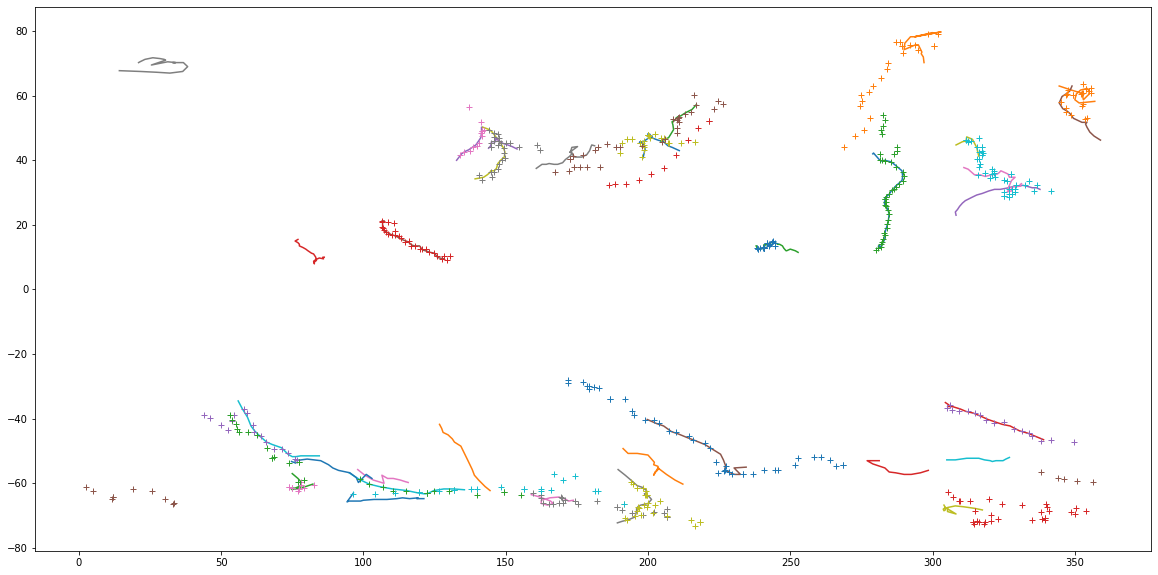

In [31]:
plt.figure(figsize=(20,10))
era_file = '/work/08589/hvtran/ls6/ERA5_PredRNN-main/validation/ERA5_TC_tracks.txt'
era_track_df = pd.read_csv(era_file)
era_track_df.columns = era_track_df.columns.str.strip()
era_groups = era_track_df.groupby('track_id')
for name, group in era_groups:
    plt.plot(group.lon, group.lat)

pred_file = '/work/08589/hvtran/ls6/ERA5_PredRNN-main/validation/prediction_2012102112_7_336.202208171216_t0_2012102200.txt'
pred_track_df = pd.read_csv(pred_file)
pred_track_df.columns = pred_track_df.columns.str.strip()
pred_groups = pred_track_df.groupby('track_id')
for name, group in pred_groups:
    plt.plot(group.lon, group.lat,'+')

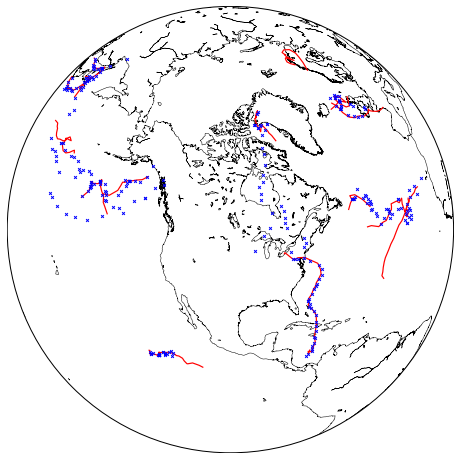

In [32]:
lonmin, lonmax = -180, 180
latmin, latmax = -90, 90

fig = plt.figure(figsize=(8,10))
axx = fig.add_subplot(111)
#m = Basemap(projection='merc', resolution="l", llcrnrlon=lonmin, llcrnrlat=latmin, urcrnrlon=lonmax, urcrnrlat=latmax)
m = Basemap(projection='ortho', resolution="l", lat_0=50, lon_0=-100)

m.drawcoastlines(color='k',linewidth=0.5,zorder=3)

for name, group in pred_groups:
    lons = group['lon'].values
    lats = group['lat'].values
    x,y = m(lons, lats)
    m.plot(x,y,'x',color='b', zorder=4,label = 'PredRNN',markersize=2.8)
#m.drawcountries(color='k',linewidth=0.1,zorder=3)

for name, group in era_groups:
    lons = group['lon'].values
    lats = group['lat'].values
    x,y = m(lons, lats)
    m.plot(x,y,'-',color='r', zorder=3,label = 'ERA5',linewidth=1.2)

#plt.savefig('storm_track2.png',dpi=200)